### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [22]:
loja_faturamento = loja['Preço'].sum()
loja2_faturamento = loja2['Preço'].sum()
loja3_faturamento = loja3['Preço'].sum()
loja4_faturamento = loja4['Preço'].sum()

<Axes: xlabel='Loja'>

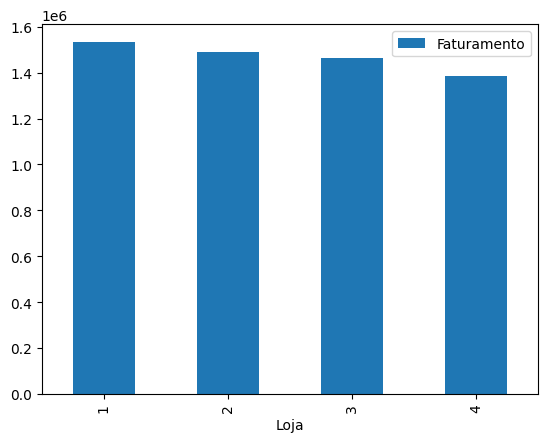

In [89]:
faturamento = pd.DataFrame({
    'Loja': [1, 2, 3, 4],
    'Faturamento': [
        loja_faturamento,
        loja2_faturamento,
        loja3_faturamento,
        loja4_faturamento]
})

faturamento.plot(x='Loja', y='Faturamento', kind='bar')

# 2. Vendas por Categoria

In [82]:
loja_vendas_categoria = loja.groupby('Categoria do Produto').size().rename('Loja 1')
loja2_vendas_categoria = loja2.groupby('Categoria do Produto').size().rename('Loja 2')
loja3_vendas_categoria = loja3.groupby('Categoria do Produto').size().rename('Loja 3')
loja4_vendas_categoria = loja4.groupby('Categoria do Produto').size().rename('Loja 4')

<Axes: ylabel='Categoria do Produto'>

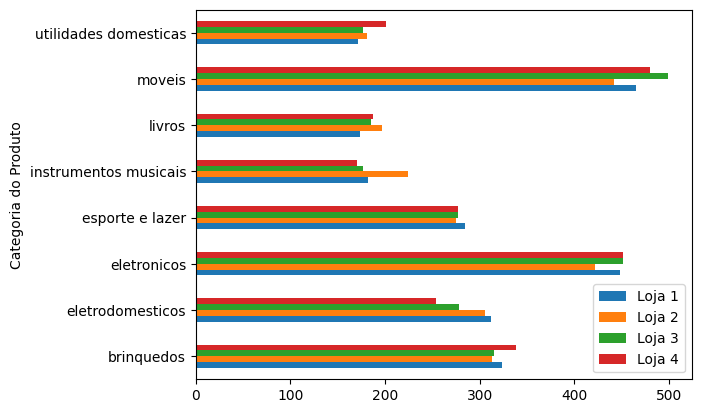

In [99]:
vendas_categoria = pd.concat([
    loja_vendas_categoria,
    loja2_vendas_categoria,
    loja3_vendas_categoria,
    loja4_vendas_categoria], axis=1)

vendas_categoria.fillna(0, inplace=True)
vendas_categoria.plot(kind='barh')

# 3. Média de Avaliação das Lojas


In [65]:
loja_avalicao_media = loja['Avaliação da compra'].mean().round()
loja2_avalicao_media = loja2['Avaliação da compra'].mean().round()
loja3_avalicao_media = loja3['Avaliação da compra'].mean().round()
loja4_avalicao_media = loja4['Avaliação da compra'].mean().round()

<Axes: xlabel='Loja'>

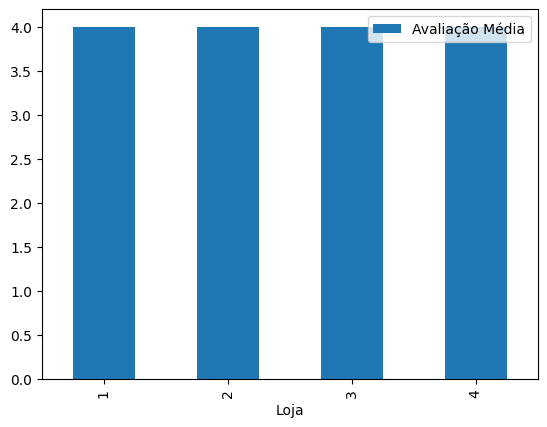

In [90]:
avaliacao_media = pd.DataFrame({
    'Loja': [1, 2, 3, 4],
    'Avaliação Média': [
        loja_avalicao_media,
        loja2_avalicao_media,
        loja3_avalicao_media,
        loja4_avalicao_media]
})

avaliacao_media.plot(x='Loja', y='Avaliação Média', kind='bar')

# 4. Produtos Mais e Menos Vendidos

In [117]:
loja_vendas_produto = loja.groupby('Produto').size().rename('Vendas')
loja2_vendas_produto = loja2.groupby('Produto').size().rename('Vendas')
loja3_vendas_produto = loja3.groupby('Produto').size().rename('Vendas')
loja4_vendas_produto = loja4.groupby('Produto').size().rename('Vendas')


<Axes: ylabel='Produto'>

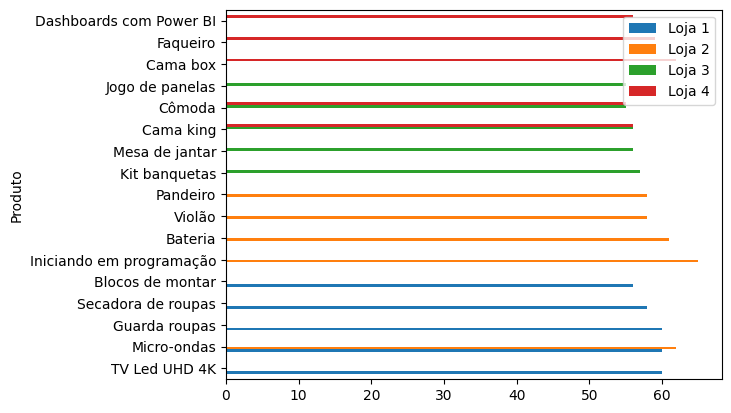

In [130]:
loja_mais_vendidos = loja_vendas_produto.sort_values(ascending=False).head(5).rename('Loja 1')
loja2_mais_vendidos = loja2_vendas_produto.sort_values(ascending=False).head(5).rename('Loja 2')
loja3_mais_vendidos = loja3_vendas_produto.sort_values(ascending=False).head(5).rename('Loja 3')
loja4_mais_vendidos = loja4_vendas_produto.sort_values(ascending=False).head(5).rename('Loja 4')

mais_vendidos = pd.concat([
    loja_mais_vendidos,
    loja2_mais_vendidos,
    loja3_mais_vendidos,
    loja4_mais_vendidos], axis=1)

mais_vendidos.plot(kind='barh')

In [124]:
loja_menos_vendidos = loja_vendas_produto.sort_values(ascending=True).head(5)
loja2_menos_vendidos = loja2_vendas_produto.sort_values(ascending=True).head(5)
loja3_menos_vendidos = loja3_vendas_produto.sort_values(ascending=True).head(5)
loja4_menos_vendidos = loja4_vendas_produto.sort_values(ascending=True).head(5)
loja_menos_vendidos

,Vendas
Produto,
Celular ABXY,33
Headset,33
Panela de pressão,35
Pandeiro,36
Mochila,39


# 5. Frete Médio por Loja